<a href="https://colab.research.google.com/github/DreenTS/NeuroEducation/blob/master/10_1_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Обнаружение фальшивых новостей

## Условие задачи

Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Твоя  задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL) или фальшивой (FAKE).

Ты должен самостоятельно изучить и применить к задаче TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.

Построй матрицу ошибок (confusion matrix). Представь, что ваш заказчик очень любит графики и диаграммы. Визуализируй для него результаты там, где это возможно.

## Импорт необходимых библиотек, классов, функций

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Функция для разделения модели на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split

# Модель обучения Пассивно-агрессивный классификатор
from sklearn.linear_model import PassiveAggressiveClassifier

# Функция для оценки точности модели
from sklearn.metrics import accuracy_score

# Функция для построение матрицы ошибок
from sklearn.metrics import confusion_matrix

## Загрузка и подготовка датасета

In [ ]:
# Загрузка датасета
df = pd.read_csv('/content/fake_news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


В датасете есть поле **label**, в котором указывается, является ли новость настоящей или же фейком. Данное поле является меткой класса. Значит, примем это поле за значения **Y**.

При этом поле **"Unnamed: 0"** не несёт в себе вообще никакой полезной информации. Было предположение, что оно как коррелирует с длиной текста новости, но это не подтвердилось:

In [ ]:
f'{len(df.iloc[0].text)} <> {df.iloc[0]["Unnamed: 0"]}'

'7518 <> 8476'

Итак, нам необходимы только два поля: **label** и **text**.

In [ ]:
df = df.drop(labels=['Unnamed: 0', 'title'], axis=1)

## Создание и обучение модели

In [ ]:
# Подготовка данных
X = df['text']
y = df['label']

# Преобразуем текст в числовые признаки с помощью TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)

# Создаем модель обучения PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)
# Обучаем классификатор
classifier.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе и оценка точности модели
y_pred = classifier.predict(X_test)

# Выводим оценку точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy*100:.2f}%')

Точность модели: 94.43%


## Построение матрицы ошибок

In [ ]:
import sklearn.metrics as sk_metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
def show_confusion_matrix(test_labels, test_classes):
  # Вычисление матрицы ошибок и ее нормализация
  plt.figure(figsize=(3,3))
  confusion = sk_metrics.confusion_matrix(test_labels,
                                          test_classes)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(3)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Матрица ошибок")
  plt.ylabel("Истинные метки")
  plt.xlabel("Предсказанные метки")

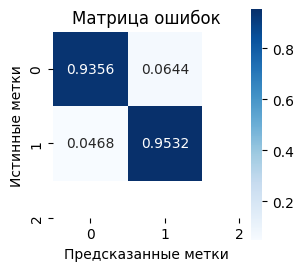

In [ ]:
show_confusion_matrix(y_test, y_pred)

# Задача 2. Обнаружение болезни паркинсона с помощью XGBoost

## Условие задачи

Предсказать заболевание паркинсона на ранней стадии, используя алгоритм машинного обучения XGBoost и библиотеку sklearn для нормализации признаков.

Использовать датасет UCI ML Parkinsons с описание признаков и меток датасета.

Помимо создания самой модели необходимо получить ее точность на тестовой выборке. Выборки делить в соотношении 80% обучающая, 20% - тестовая.

Дополнительные баллы возможно получить, если точность модели окажется более 95%.

## Импортирование необходимых библиотек

In [ ]:
# Импорт Классификатора XGBoost
from xgboost import XGBClassifier

## Загрузка и подготовка датасета

In [ ]:
# Загрузка датасета
data = pd.read_csv('/content/parkinsons.data')

In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
with open('/content/parkinsons.names', 'r') as file:
       print(file.read())

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
rec

Итак, поле **name** отражает имя записи, поле **status** - болен пациент или нет (метка класса). Остальные поля датасета являются параметрами.

In [ ]:
# Определение признаков и меток
X = data.drop(['name', 'status'], axis=1)
y = data['status']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Обучаем модель классификатора XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Проводим оценку точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy*100:.2f}%')

Точность модели: 97.44%


## Построение матрицы ошибок

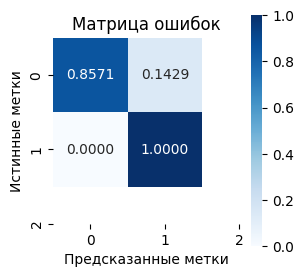

In [ ]:
show_confusion_matrix(y_test, y_pred)